In [4]:
import redivis
user = redivis.user("stanfordgsblibrary")
dataset = user.dataset("wikipedia_change_metadata")
table = dataset.table("metadata")

### Connecting to Redivis and Downloading Data

In [14]:
# Load table as a dataframe
df = table.to_dataframe(max_results=1000000, variables=['id','page_id', 'timestamp', 'cont_username'])

In [15]:
# Load table as a dataframe
df = table.to_dataframe(variables=['id','page_id', 'timestamp', 'cont_username'])

In [18]:
df = df[df['cont_username'] != '<NA>']

In [23]:
df.to_csv("/Volumes/Extrema/wiki/article_data/article_metadata_shortened.csv", index=False)

In [26]:
page_authors = df[['cont_username', 'page_id']].drop_duplicates()

In [29]:
page_authors.to_csv('page_author_only.csv', index=False)

### Loading Data and Computing Stats

In [1]:
import pandas as pd
import random

page_authors = pd.read_csv('/Users/Lara/Documents/Stanford/Research/Network/processed_data/page_author_only.csv')

In [2]:
author2pages = page_authors.groupby('cont_username')['page_id'].apply(list).to_dict()

In [3]:
page2num_authors = page_authors.groupby('page_id')['cont_username'].apply(list).apply(len).to_dict()

In [4]:
author2num_pages = {k:len(v) for k, v in author2pages.items()}

In [18]:
bots_df = pd.read_csv('/Users/Lara/Documents/Stanford/Research/Network/processed_data/all_bots.csv')
bots = bots_df['0'].to_list()

In [22]:
page_humans = page_authors.loc[~page_authors["cont_username"].isin(bots)]
page2num_humans = page_humans.groupby('page_id')['cont_username'].apply(len).to_dict()

### Plotting

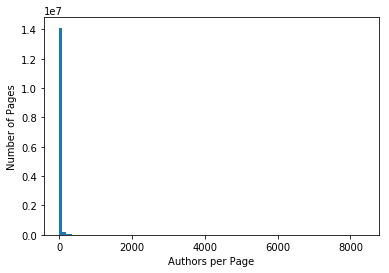

In [30]:
import matplotlib.pyplot as plt
authors = list(page2num_authors.values())

plt.hist(authors, bins=100)
plt.ylabel('Number of Pages')
plt.xlabel('Authors per Page');

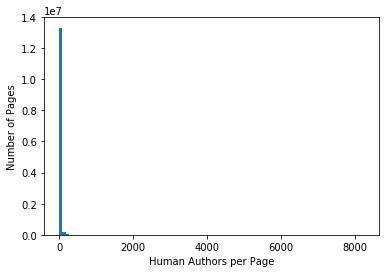

In [31]:
authors_no_bots = list(page2num_humans.values())
plt.hist(authors_no_bots, bins=100)
plt.ylabel('Number of Pages')
plt.xlabel('Human Authors per Page');

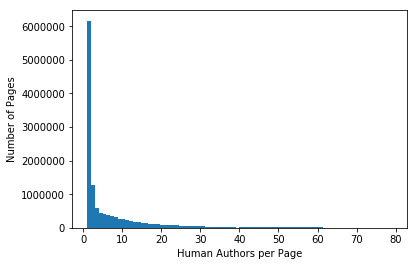

In [34]:
truncated_authors = [i for i in authors_no_bots if i <= 80]
plt.hist(truncated_authors, bins=80)
plt.ylabel('Number of Pages')
plt.xlabel('Human Authors per Page');

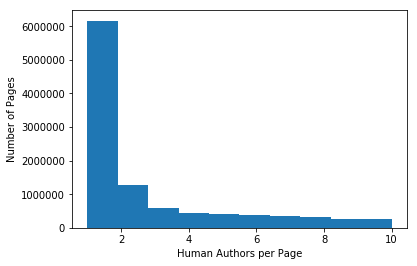

In [43]:
truncated_authors = [i for i in authors_no_bots if i <= 10]
plt.hist(truncated_authors, bins=10)
plt.ylabel('Number of Pages')
plt.xlabel('Human Authors per Page');

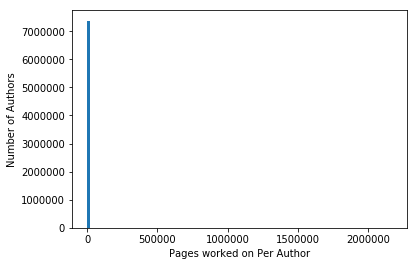

In [16]:
pages = list(author2num_pages.values())
plt.hist(pages, bins=100)
plt.ylabel('Number of Authors')
plt.xlabel('Pages worked on Per Author');

In [27]:
humans2pages = page_humans.groupby('cont_username')['page_id'].apply(list).to_dict()
humans2num_pages = {k:len(v) for k, v in humans2pages.items()}

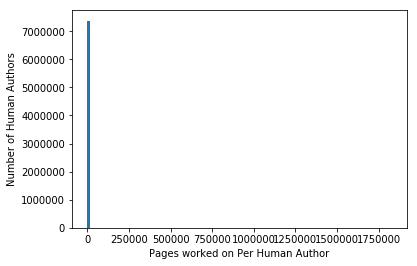

In [28]:
pages = list(humans2num_pages.values())
plt.hist(pages, bins=100)
plt.ylabel('Number of Human Authors')
plt.xlabel('Pages worked on Per Human Author');

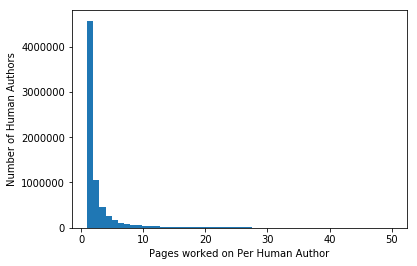

In [55]:
truncated_pages = [p for p in pages if p <= 50]
plt.hist(truncated_pages, bins=50)
plt.ylabel('Number of Human Authors')
plt.xlabel('Pages worked on Per Human Author');

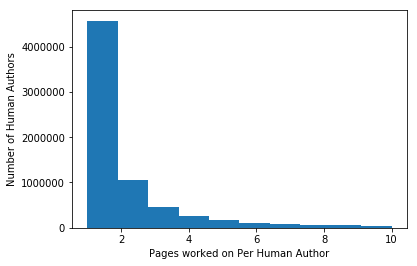

In [56]:
truncated_pages = [p for p in pages if p <= 10]
plt.hist(truncated_pages, bins=10)
plt.ylabel('Number of Human Authors')
plt.xlabel('Pages worked on Per Human Author');

### Dyad Calculations

In [59]:
multi_author_2 = sum([1 for a in authors if a > 1])
human_author_2 = sum([1 for a in authors_no_bots if a > 1])
multi_author_10 = sum([1 for a in authors if a > 10])
human_author_10 = sum([1 for a in authors_no_bots if a > 10])

print('{} pages out of {} pages had more than one author, about {}%'.format(
    multi_author_2, len(authors), round(100*(multi_author_2/len(authors)), 2)))

print('{} pages out of {} pages had more than one human author, about {}%'.format(
    human_author_2, len(authors), round(100*(human_author_2/len(authors)), 2)))

print('{} pages out of {} pages had more than ten author, about {}%'.format(
    multi_author_10, len(authors), round(100*(multi_author_10/len(authors)), 2)))

print('{} pages out of {} pages had more than ten human author, about {}%'.format(
    human_author_10, len(authors), round(100*(human_author_10/len(authors)), 2)))

9193355 pages out of 14450551 pages had more than one author, about 63.62%
7402126 pages out of 14450551 pages had more than one human author, about 51.22%
3923861 pages out of 14450551 pages had more than ten author, about 27.15%
3146415 pages out of 14450551 pages had more than ten human author, about 21.77%


In [30]:
import random
random_subset = dict(random.sample(author2pages.items(), int(len(author2pages)/1000)))

In [31]:
from tqdm import tqdm
dyad2collabs = defaultdict(int)
for i, i_pages in tqdm(random_subset.items()):
    for j, j_pages in random_subset.items():
        if i != j and (j, i) not in dyad2collabs:
                dyad2collabs[(i, j)] = len(set(i_pages) & set(j_pages))

100%|██████████| 7373/7373 [01:01<00:00, 119.74it/s]


In [32]:
multi_collab_dyads = sum([1 for dyad, collabs in dyad2collabs.items() if collabs > 1])

In [38]:
print('{} out of {} dyads had worked on more than one page together, about {}%'.format(
    multi_collab_dyads, len(dyad2collabs), round(100*(multi_collab_dyads/len(dyad2collabs)), 3)))

612 out of 27176878 dyads had worked on more than one page together, about 0.002%


In [63]:
random_subset = dict(random.sample(humans2pages.items(), int(len(humans2pages)/1000)))

In [66]:
from tqdm import tqdm
from collections import defaultdict
human_dyad2collabs = defaultdict(int)
for i, i_pages in tqdm(random_subset.items()):
    for j, j_pages in random_subset.items():
        if i != j and (j, i) not in human_dyad2collabs:
                human_dyad2collabs[(i, j)] = len(set(i_pages) & set(j_pages))

100%|██████████| 7372/7372 [01:12<00:00, 101.44it/s]


In [69]:
collab_human_dyads = sum([1 for dyad, collabs in human_dyad2collabs.items() if collabs == 0])
print('{} out of {} dyads had worked on no page together, about {}%'.format(
    collab_human_dyads, len(human_dyad2collabs), round(100*(collab_human_dyads/len(human_dyad2collabs)), 3)))

collab_human_dyads = sum([1 for dyad, collabs in human_dyad2collabs.items() if collabs == 1])
print('{} out of {} dyads had worked on exactly one page together, about {}%'.format(
    collab_human_dyads, len(human_dyad2collabs), round(100*(collab_human_dyads/len(human_dyad2collabs)), 3)))

collab_human_dyads = sum([1 for dyad, collabs in human_dyad2collabs.items() if collabs > 1])
print('{} out of {} dyads had worked on more than one page together, about {}%'.format(
    collab_human_dyads, len(human_dyad2collabs), round(100*(collab_human_dyads/len(human_dyad2collabs)), 3)))

27164833 out of 27169506 dyads had worked on no page together, about 99.983%
3978 out of 27169506 dyads had worked on exactly one page together, about 0.015%
695 out of 27169506 dyads had worked on more than one page together, about 0.003%
